In [2]:
import pandas as pd
import numpy as np
import anndata as ad
import sgkit as sg
import cellink  as cl
from pathlib import Path
import matplotlib.pyplot as plt
import pickle
from plotnine import *

In [3]:
from cellink.io import read_sgkit_zarr

In [4]:
package_dir = Path("~/git/sc-genetics")

In [5]:
zarr_file_path = package_dir / "tests/data/chr22.dose.filtered.R2_0.8.vcz"
# genotype zarr file

## Load data as zarr file 

In [8]:
gdata = read_sgkit_zarr(zarr_file_path)
gdata

AnnData object with n_obs × n_vars = 1034 × 143083
    obs: 'id'
    var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'
    varm: 'filter'

## Write variants to VCF for annotation 

In [6]:
cl.tl.write_variants_to_vcf(gdata, out_file= package_dir / "tests/data/variants.vcf")

[2024-10-09 22:12:55,803] INFO:cellink.tl._annotate_snps_genotype_data: number of variants to annotate: 143083
[2024-10-09 22:12:55,803] INFO:cellink.tl._annotate_snps_genotype_data: Writing variants to variants.vcf


## Annotate variants

### Using VEP 

### run VEP

In [7]:
anno_file = package_dir / "tests/data/variants_vep_annotated.txt"
config_file = "../docs/example/config.yaml"

In [8]:
# cl.tl.run_vep(config_file,
#              input_vcf="variants.vcf",
#              output=anno_file) #writes "variant_vep_annotated.txt"


### process VEP annos

In [9]:
%%time
gdata = cl.tl.add_vep_annos_to_gdata(anno_file, gdata,
                             cols_to_explode=["Consequence"],
                             cols_to_dummy=["Consequence"])
gdata

[2024-10-09 22:12:56,605] INFO:cellink.tl._annotate_snps_genotype_data: Index(['#Uploaded_variation', 'Location', 'Allele', 'Gene', 'Feature',
       'Feature_type', 'Consequence', 'cDNA_position', 'CDS_position',
       'Protein_position', 'Amino_acids', 'Codons', 'Existing_variation',
       'IMPACT', 'DISTANCE', 'STRAND', 'FLAGS', 'BIOTYPE', 'CANONICAL', 'ENSP',
       'SIFT', 'PolyPhen', 'gnomADe_AF', 'gnomADe_AFR_AF', 'gnomADe_AMR_AF',
       'gnomADe_ASJ_AF', 'gnomADe_EAS_AF', 'gnomADe_FIN_AF', 'gnomADe_NFE_AF',
       'gnomADe_OTH_AF', 'gnomADe_SAS_AF', 'CLIN_SIG', 'SOMATIC', 'PHENO',
       'CADD_PHRED', 'CADD_RAW', 'TSSDistance'],
      dtype='object')
[2024-10-09 22:12:56,930] INFO:cellink.tl.utils: Exploding column Consequence
[2024-10-09 22:12:57,555] INFO:cellink.tl.utils: Number of original rows: 182552.
 Number of exploded rows: 200116
[2024-10-09 22:12:57,567] INFO:cellink.tl.utils: Making dummies from column Consequence
[2024-10-09 22:12:57,907] INFO:cellink.tl._annota

AnnData object with n_obs × n_vars = 1034 × 143083
    obs: 'id'
    var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'
    varm: 'annotations_0', 'annotations_1', 'annotations_2', 'annotations_3', 'annotations_4', 'annotations_5', 'annotations_6', 'annotations_7'

In [10]:
gdata

AnnData object with n_obs × n_vars = 1034 × 143083
    obs: 'id'
    var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'
    varm: 'annotations_0', 'annotations_1', 'annotations_2', 'annotations_3', 'annotations_4', 'annotations_5', 'annotations_6', 'annotations_7'

In [11]:
gdata.write("gdata.h5ad")

... storing 'chrom' as categorical
... storing 'a0' as categorical
... storing 'a1' as categorical
... storing 'id' as categorical


## Load data 

In [2]:
gdata = ad.read_h5ad("gdata.h5ad")
gdata

AnnData object with n_obs × n_vars = 1034 × 143083
    obs: 'id'
    var: 'chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id', 'id_mask', 'quality'
    varm: 'annotations_0', 'annotations_1', 'annotations_2', 'annotations_3', 'annotations_4', 'annotations_5', 'annotations_6', 'annotations_7'

## Explore/Plot annotations

In [3]:
anno = gdata.var.join(gdata.varm["annotations_0"])

### histogram for any annotation


In [43]:
anno.columns

Index(['chrom', 'pos', 'a0', 'a1', 'AF', 'ER2', 'maf', 'R2', 'contig', 'id',
       'id_mask', 'quality', 'gnomADe_AF', 'gnomADe_EAS_AF', 'CADD_RAW',
       'gnomADe_OTH_AF', 'PHENO', 'gnomADe_AFR_AF', 'CADD_PHRED',
       'Consequence_start_lost', 'gnomADe_ASJ_AF', 'Existing_variation',
       'Location', 'gnomADe_FIN_AF', 'gnomADe_SAS_AF', 'gnomADe_NFE_AF',
       'Feature_type', 'Consequence_intergenic_variant', 'Allele',
       'gnomADe_AMR_AF', 'CLIN_SIG', 'SOMATIC', 'Gene', 'Feature',
       'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids',
       'Codons', 'IMPACT', 'DISTANCE', 'STRAND', 'FLAGS', 'BIOTYPE',
       'CANONICAL', 'ENSP', 'SIFT', 'PolyPhen', 'TSSDistance',
       'Consequence_3_prime_UTR_variant', 'Consequence_5_prime_UTR_variant',
       'Consequence_NMD_transcript_variant',
       'Consequence_coding_sequence_variant',
       'Consequence_downstream_gene_variant',
       'Consequence_incomplete_terminal_codon_variant',
       'Consequence_intron_

Text(0.5, 0, 'MAF')

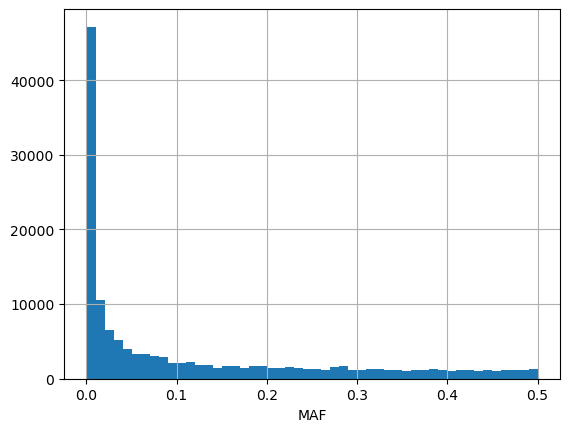

In [59]:
anno['maf'].hist(bins = 50)
plt.xlabel("MAF")

<Axes: >

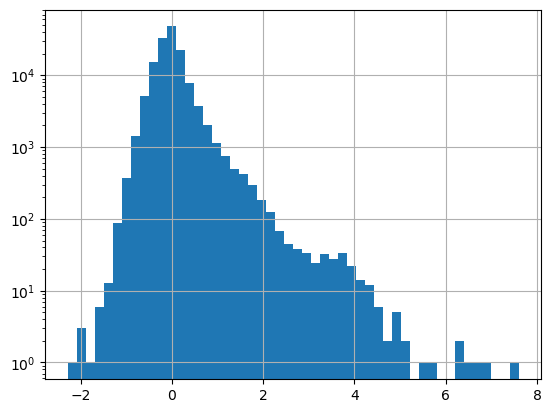

In [34]:
anno['CADD_RAW'].hist(bins = 50, log = True)

Text(0.5, 0, 'TSSDistance')

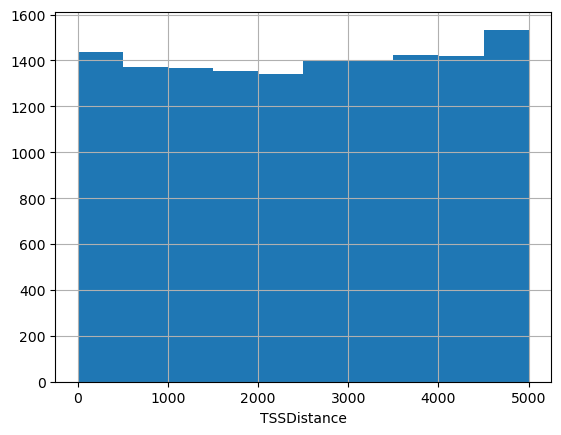

In [55]:
anno["TSSDistance"].dropna().hist()
plt.xlabel("TSSDistance")

Text(0.5, 0, 'Unique Variants per Gene')

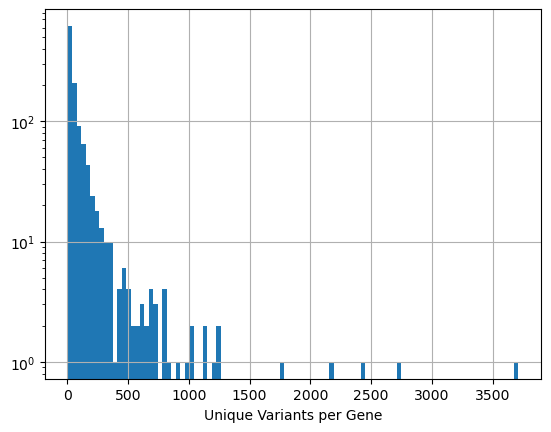

In [57]:
anno.query("Gene != '-'").groupby("Gene").size().hist(log = True, bins = 100)
plt.xlabel("Unique Variants per Gene")

In [20]:
anno["IMPACT"].unique()

array(['MODIFIER', 'MODERATE', 'LOW', 'HIGH'], dtype=object)

In [61]:
vars_to_keep = anno[anno["IMPACT"] == "HIGH"].index

In [80]:
high_impact_count = pd.Series(gdata[:, gdata.var_names.isin(vars_to_keep)].X.sum(axis = 1))
high_impact_count.index = gdata.obs.index
high_impact_count.index[high_impact_count.argmax()]

'11'

<Axes: >

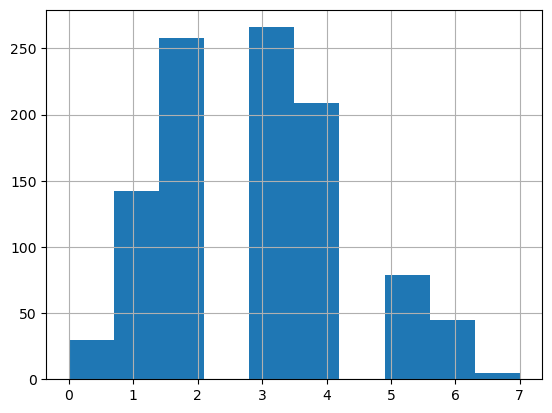

In [81]:
high_impact_count.hist()

### Analyse variant consequences

#### All unique variants

In [156]:
anno_impact = pd.from_dummies(anno_c)
anno_impact.columns = ["Consequence"]
anno_impact = anno_impact.join(anno["IMPACT"]).drop_duplicates()
print(anno_impact.columns)

Index(['Consequence', 'IMPACT'], dtype='object')


In [179]:
c_cols = [c for c in anno.columns if "Conseq" in c]

anno_c = anno[c_cols]

c_counts = anno_c.multiply(anno["maf"]* 2 * gdata.n_obs, axis=0)\
    .sum(axis = 0).to_frame(name = "count").reset_index(names = ["Consequence"])
c_counts = c_counts.merge(anno_impact)
c_counts["Consequence"] = c_counts["Consequence"].str.replace("Consequence_", "")
c_counts['Consequence'] = pd.Categorical(c_counts['Consequence'],
                                     categories=c_counts.sort_values("count")["Consequence"], ordered=True)
c_counts

,Consequence,count,IMPACT
0,start_lost,2.267562e+02,HIGH
1,intergenic_variant,9.156695e+06,MODIFIER
2,3_prime_UTR_variant,4.249849e+05,MODIFIER
3,5_prime_UTR_variant,6.094204e+04,MODIFIER
4,downstream_gene_variant,3.536837e+06,MODIFIER
5,incomplete_terminal_codon_variant,8.343760e+02,LOW
6,intron_variant,1.838194e+07,MODIFIER
7,mature_miRNA_variant,1.712097e+02,MODIFIER
8,missense_variant,1.489745e+05,MODERATE
9,non_coding_transcript_exon_variant,3.718055e+05,MODIFIER


[2024-10-10 09:42:34,862] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


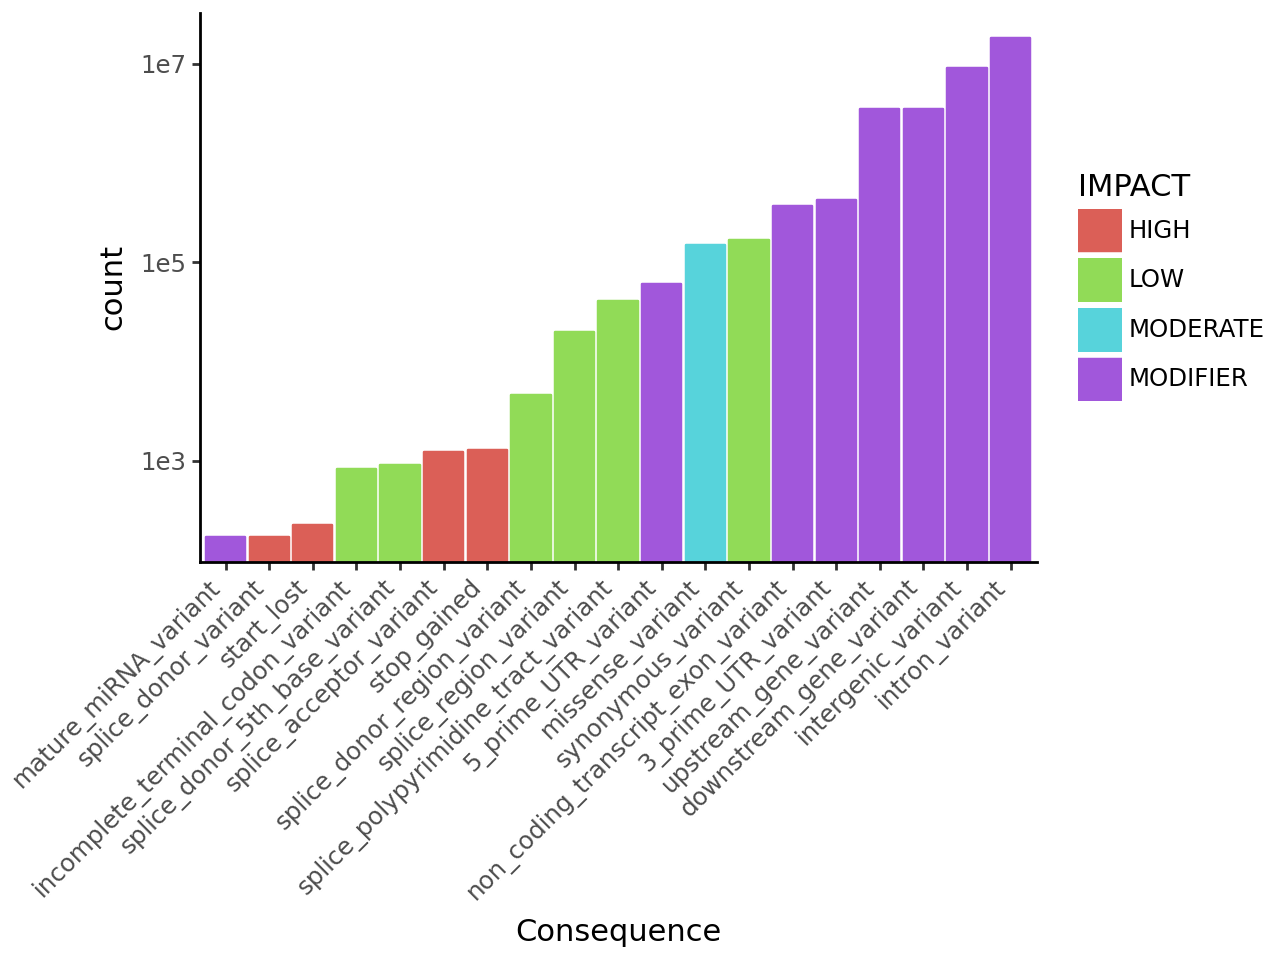

In [180]:
plot = (
    ggplot(c_counts, aes(x='Consequence', y='count'))  # Specify the x and y variables
    + geom_bar(aes(fill = "IMPACT", color = "IMPACT"), stat = "identity")  # Add the boxplot layer
    + theme_classic()  # Optional: use a clean theme
    + scale_y_log10()
    + theme(axis_text_x = element_text(angle = 45, hjust = 1, vjust = 1))
)
plot

#### Consquences per individual

In [155]:
res_list = []
for col in c_cols:
    res = pd.Series(gdata[:, gdata.var_names.isin(anno[anno[col] == 1].index)].X.sum(axis = 1), 
             name = col)
    res_list.append(res)
c_counts = pd.concat(res_list, axis = 1)
c_counts = c_counts.melt(value_name = "variants per individual", var_name = "Consequence")

c_counts = c_counts.merge(anno_impact)

c_counts["Consequence"] = c_counts["Consequence"].str.replace("Consequence_", "")

median_values = c_counts.groupby('Consequence')['variants per individual'].median().sort_values()

c_counts['Consequence'] = pd.Categorical(c_counts['Consequence'],
                                     categories=median_values.index, ordered=True)

c_counts

,Consequence,variants per individual,IMPACT
0,start_lost,0,HIGH
1,start_lost,0,HIGH
2,start_lost,0,HIGH
3,start_lost,0,HIGH
4,start_lost,0,HIGH
...,...,...,...
19641,upstream_gene_variant,4857,MODIFIER
19642,upstream_gene_variant,4869,MODIFIER
19643,upstream_gene_variant,4503,MODIFIER
19644,upstream_gene_variant,5000,MODIFIER


In [102]:
from plotnine import *

/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 3373 rows containing non-finite values.


[2024-10-10 09:23:06,370] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


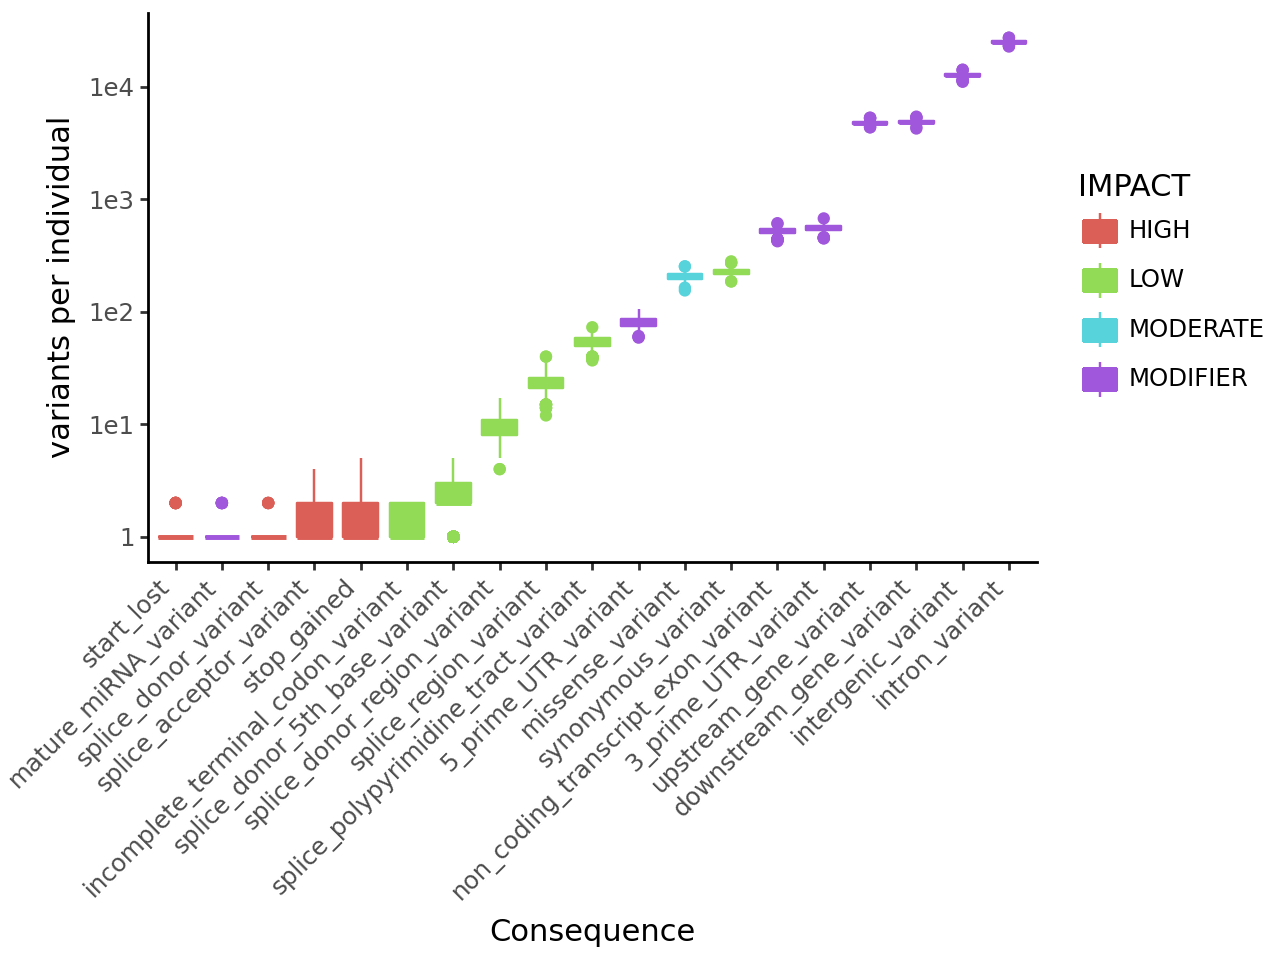

In [157]:
plot = (
    ggplot(c_counts, aes(x='Consequence', y='variants per individual'))  # Specify the x and y variables
    + geom_boxplot(aes(fill = "IMPACT", color = "IMPACT"))  # Add the boxplot layer
    + theme_classic()  # Optional: use a clean theme
    + scale_y_log10()
    + theme(axis_text_x = element_text(angle = 45, hjust = 1, vjust = 1))
)
plot

### Heatmap of individual high impact variant genotypes

In [162]:
anno_col = "Consequence_missense_variant"
genos = gdata[:, gdata.var_names.isin(anno[anno[col] == 1].index)].X 
genos

ArrayView([[2, 0, 1, ..., 0, 0, 0],
           [2, 0, 1, ..., 0, 0, 0],
           [2, 0, 1, ..., 0, 0, 0],
           ...,
           [2, 0, 0, ..., 0, 0, 0],
           [2, 0, 0, ..., 0, 0, 0],
           [2, 0, 1, ..., 0, 0, 1]])

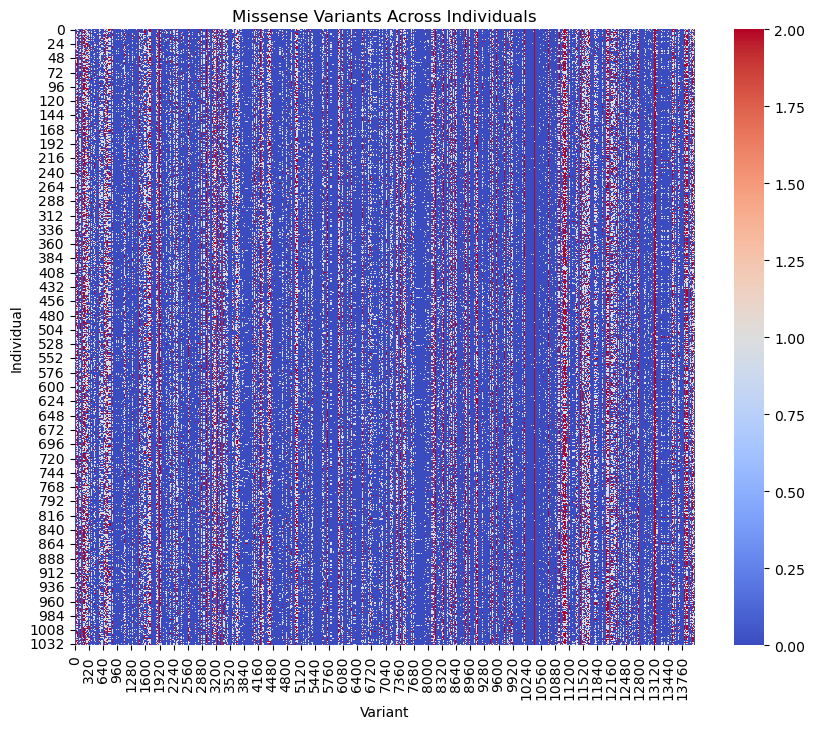

In [166]:
import seaborn as sns

# Create a heatmap of the genotype data (presence of variants)
plt.figure(figsize=(10, 8))
sns.heatmap(genos, cmap='coolwarm', cbar=True)
plt.title('Missense Variants Across Individuals')
plt.xlabel('Variant')
plt.ylabel('Individual')
plt.show()

/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.


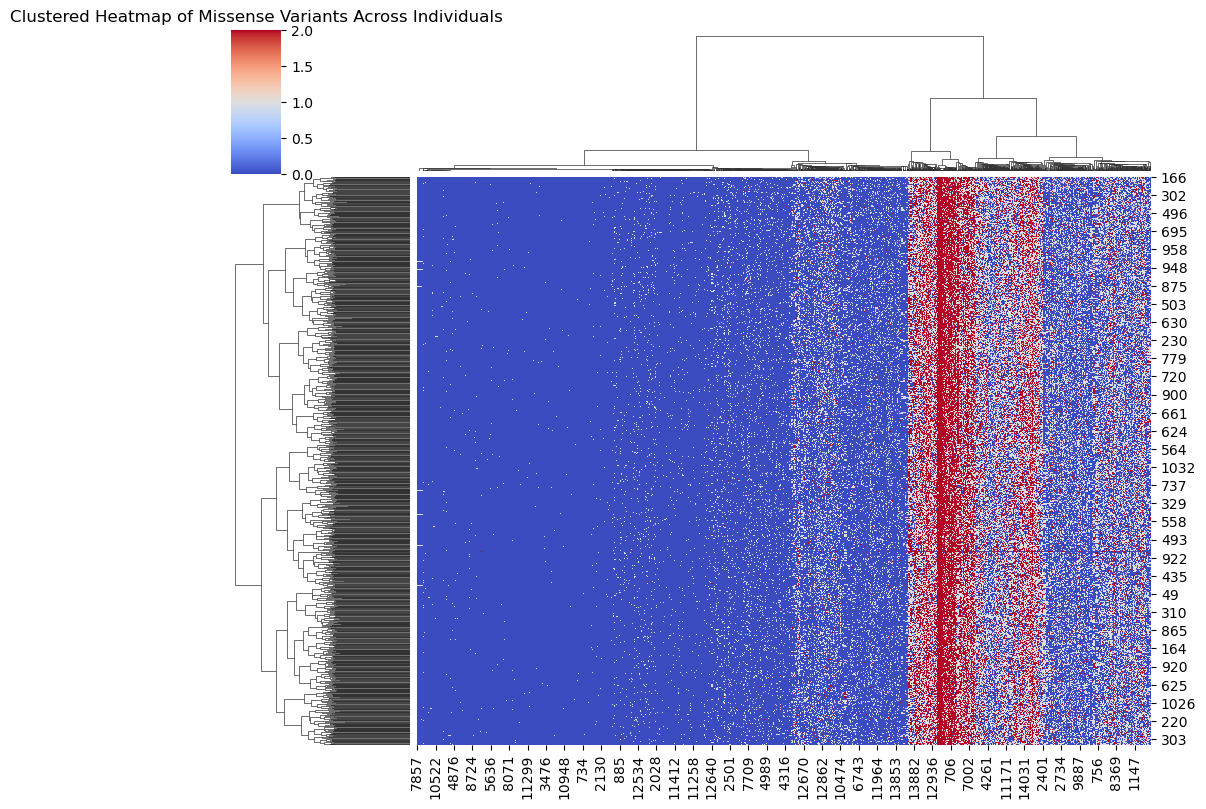

In [167]:
sns.clustermap(genos, cmap='coolwarm', figsize=(10, 8), metric='euclidean', method='ward')

# Display the heatmap
plt.title('Clustered Heatmap of Missense Variants Across Individuals')
plt.show()

### Number of non-na values per variant Consequence

In [206]:
anno_dum = pd.from_dummies(anno_c)
anno_dum.columns = ["Consequence"]
merged = anno_dum\
    .join(anno[["DISTANCE", "TSSDistance", "SIFT", "PolyPhen", "CADD_RAW"]])

In [211]:
nonna_per_cat = merged.groupby("Consequence").count().reset_index().set_index("Consequence")
nonna_per_cat

,DISTANCE,TSSDistance,SIFT,PolyPhen,CADD_RAW
Consequence,,,,,
Consequence_3_prime_UTR_variant,0,0,0,0,1766
Consequence_5_prime_UTR_variant,0,0,0,0,265
Consequence_downstream_gene_variant,13931,0,0,0,13931
Consequence_incomplete_terminal_codon_variant,0,0,0,0,1
Consequence_intergenic_variant,0,0,0,0,33445
Consequence_intron_variant,0,0,0,0,76164
Consequence_mature_miRNA_variant,0,0,0,0,1
Consequence_missense_variant,0,0,806,821,821
Consequence_non_coding_transcript_exon_variant,0,0,0,0,1556


/opt/modules/i12g/anaconda/envs/eh_scgenetics_v1/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10


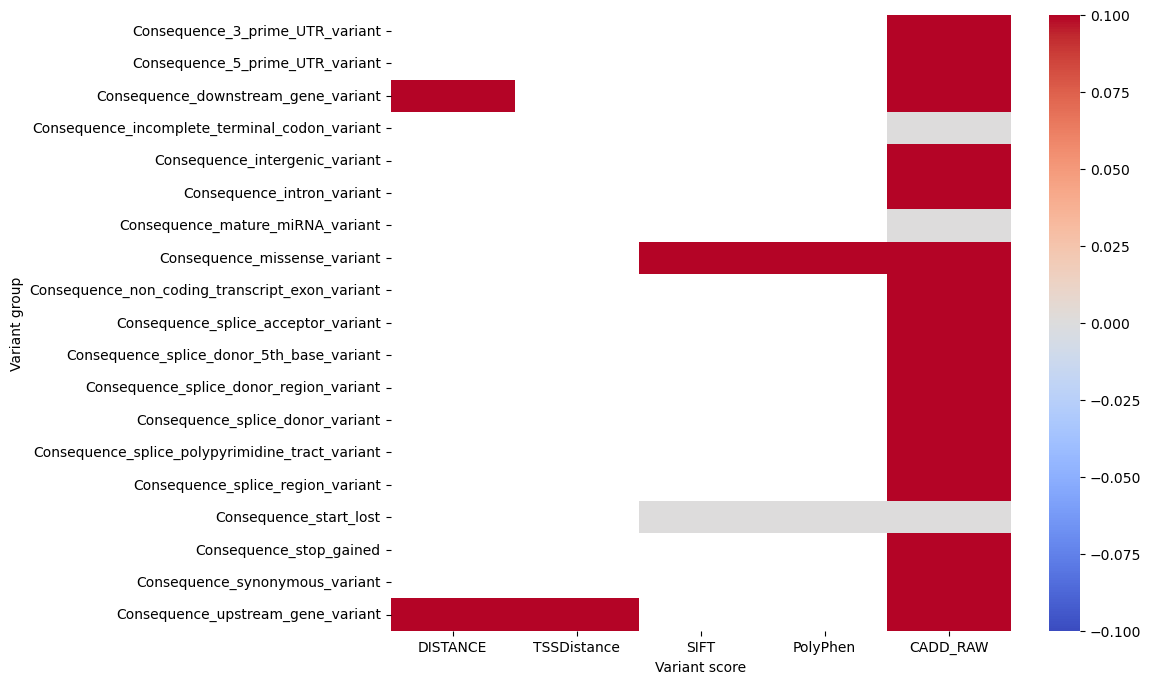

In [217]:
plt.figure(figsize=(10, 8))
sns.heatmap(np.log10(nonna_per_cat), cmap='coolwarm', cbar=True)
plt.title('')
plt.xlabel('Variant score')
plt.ylabel('Variant group')
plt.show()